In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

    # Select a classification dataset
    # Normalize the dataset
    # Handle any missing values or Outliers
    # Drop the target class for resting
    # Apply standard values function fo the values
    # Define the layers for the feed forward neural networks. 
    # Compile the model
    # Fit the custom model with testing data
    # Evaluate model performance and accuracy for the respective classification and regression model.
    # the four regularization methods used are :
        1. L1 REGULARIZATION ;
            JL1(w) = J(w)+lamda.sum(i=1 to n)|wi^2|
            lamda -> regularization parameter
            |wi| -> absolute value of weight with ith feature
        2. L2 REGULARIZATION :
            JL2(w) = J(w)+lamda.sum(i=1 to n)|wi|
            lamda -> regularization parameter
            |wi^2| -> square of the absolute value of weight with ith feature
        3. DROPOUT REGULARIZATION :
            Y` = y.m/(1-p)
            Y`->modified output of nueron after dropout
            m->dropout mask
            p->dropout probability
            y->output of nueron
        4. EARLY STOPPING :
            no improvement criteria
            Ut-k<=Ut-k+1<= ... <= Ut from k consecutive epochs

            performance degradation
            stop training if Ut-d > best metric for d consecutive epochs after reaching the best metric
            Ut->validation metric evaluated after epoch t

In [47]:
column_names = [
    'id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
    'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
    'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
    'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

In [2]:
#dataset=pd.read_csv(r"D:\SEM 6\ML LAB\PROBLEMS\4. Feed forward NN4\diabetes2.csv",header=None,names=column_names)
dataset=pd.read_csv(r"D:\SEM 6\ML LAB\PROBLEMS\4. Feed forward NN4\diabetes2.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

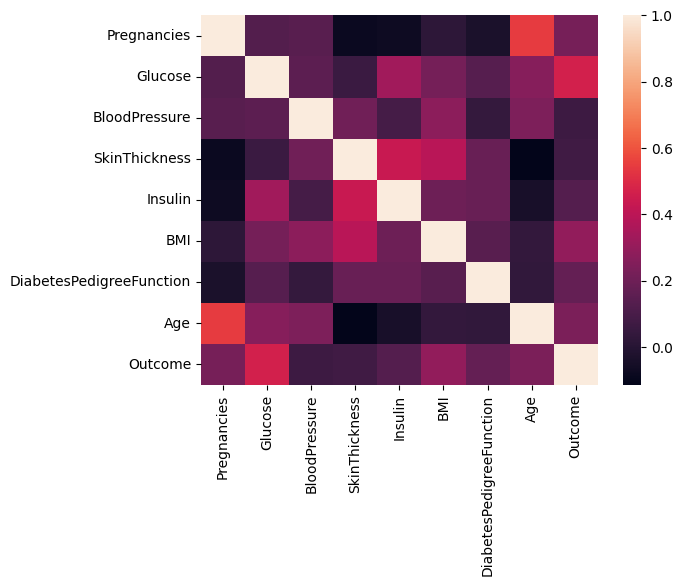

In [7]:
sns.heatmap(dataset.corr())

In [8]:
for i in dataset:
    print(i," has these unique values:",dataset[i].unique())

Pregnancies  has these unique values: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose  has these unique values: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure  has these unique values: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness  has these unique values: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 3

Text(0.5, 0, 'Outcome')

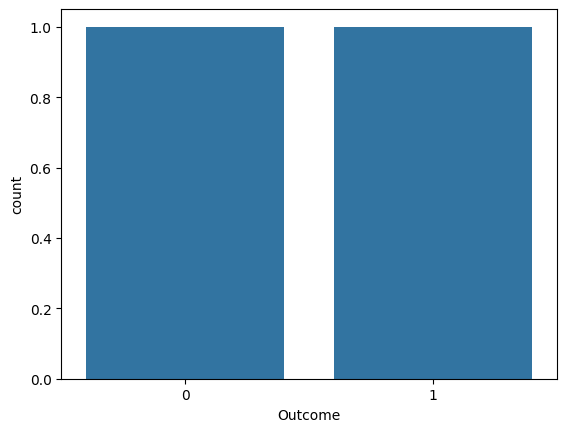

In [10]:
sns.countplot(dataset["Outcome"].unique())
plt.xlabel("Outcome")

In [3]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

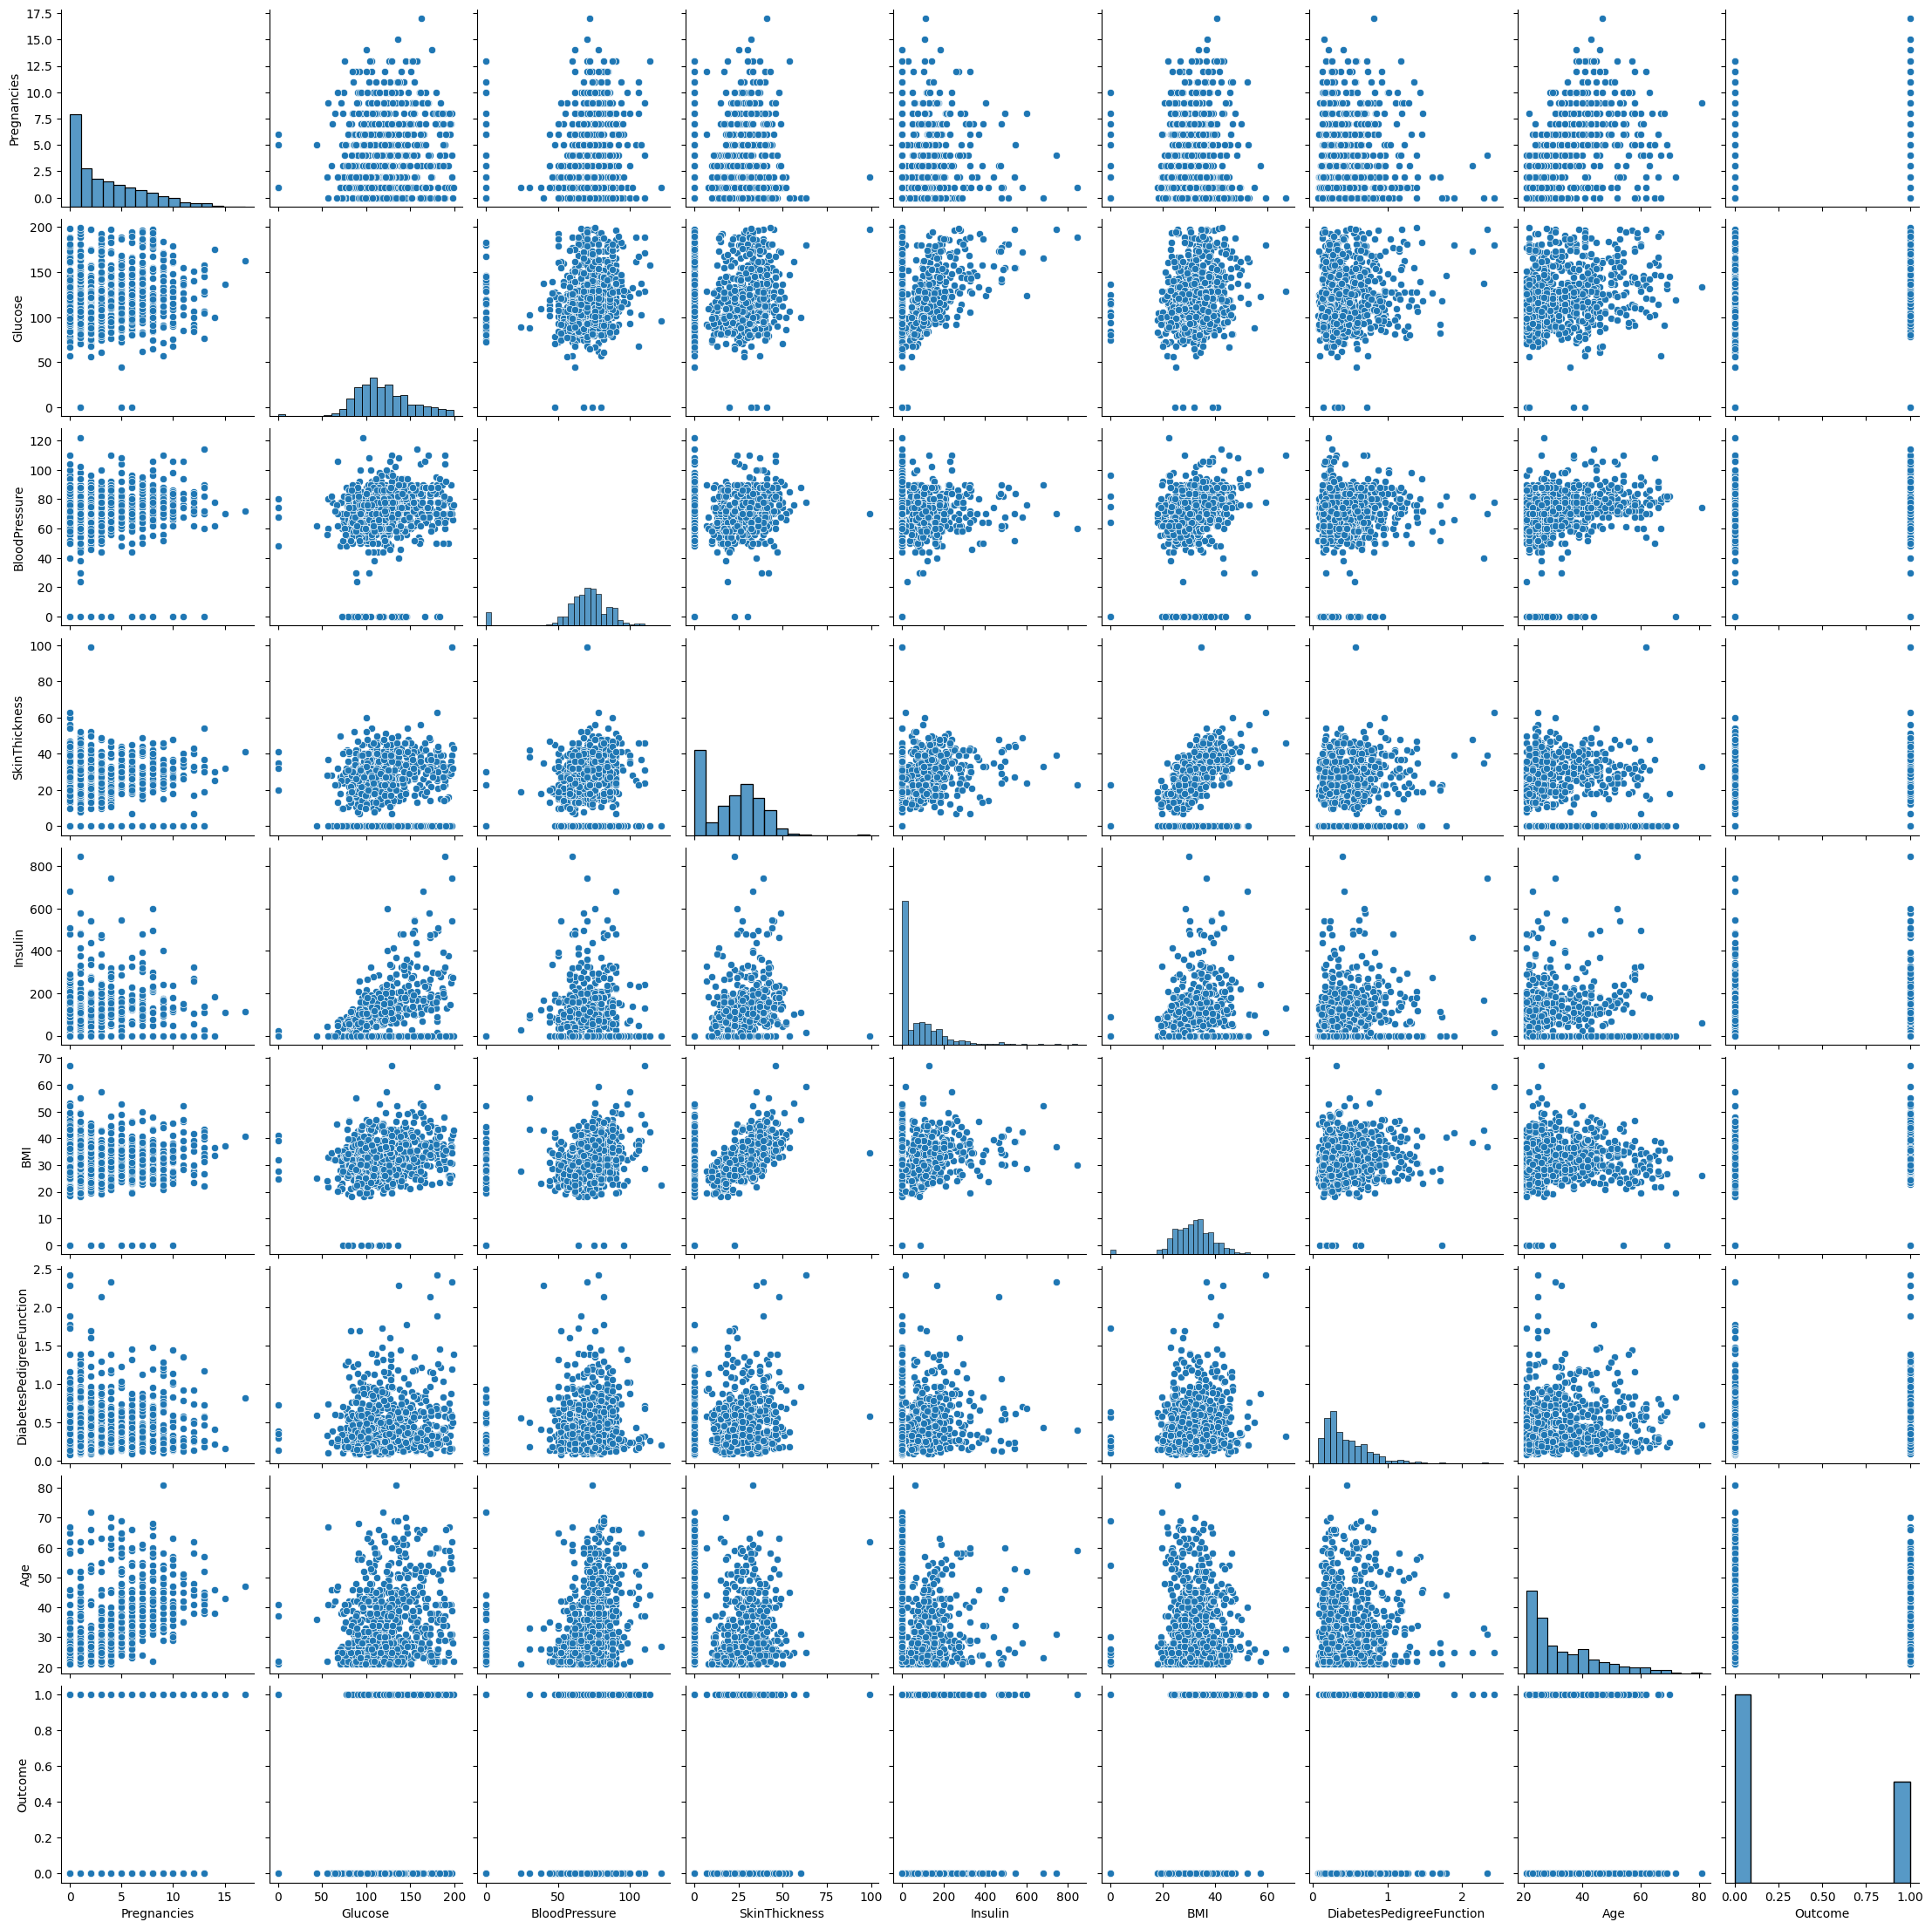

In [11]:
sns.pairplot(dataset)
plt.show()

In [12]:
dataset.fillna(method ='ffill', inplace = True)

C:\Users\23820\AppData\Local\Temp\ipykernel_10588\1594622511.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method ='ffill', inplace = True)


In [13]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Separate features and target variable
X = dataset.drop(columns=['Outcome'])
y = dataset['Outcome']

In [17]:
# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [18]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ANN CLASSIFICATION

In [22]:
# Define the Classification model
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
classification_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = classification_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6430 - loss: 0.6671 - val_accuracy: 0.6558 - val_loss: 0.6363
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6859 - loss: 0.5948 - val_accuracy: 0.7078 - val_loss: 0.5809
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7164 - loss: 0.5261 - val_accuracy: 0.7338 - val_loss: 0.5437
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.5040 - val_accuracy: 0.7013 - val_loss: 0.5282
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4570 - val_accuracy: 0.7468 - val_loss: 0.5216
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7898 - loss: 0.4647 - val_accuracy: 0.7597 - val_loss: 0.5193
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8003 - loss: 0.4209 - val_accuracy: 0.7532 - val_loss: 0.5169
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4329 - val_accuracy: 0.7338 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


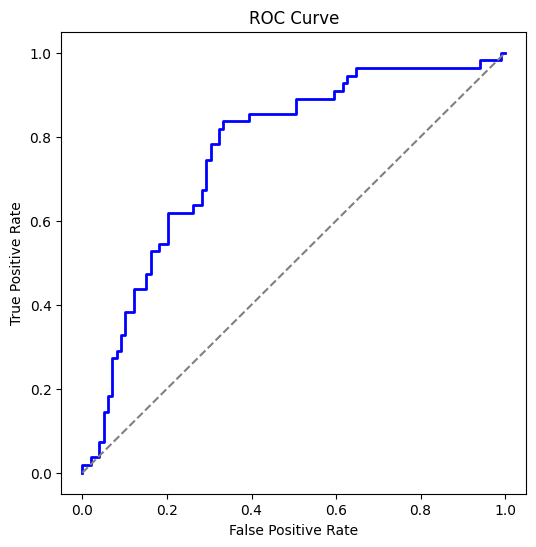

In [24]:
# Generate ROC curve
y_pred_prob = classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [25]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.6821 - loss: 1.0362
Classification Loss: 1.0098106861114502
Classification Accuracy: 0.6948052048683167
AUC Score: 0.7656565656565657
Confusion Matrix:
[[71 28]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        99
           1       0.56      0.65      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.70       154



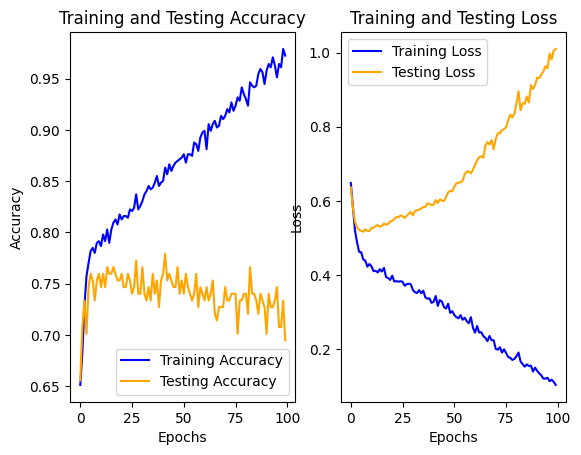

<Figure size 1200x600 with 0 Axes>

In [26]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

# ANN REGRESSION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Daily_Demand_Forecasting_Orders.csv",delimiter=';')
dataset

In [ ]:
X = dataset.drop(columns=["Target (Total orders)"])
y = dataset["Target (Total orders)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
regression_model = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
regression_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

In [ ]:
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

In [ ]:
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
regression_model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
history = regression_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

In [ ]:
train_loss = regression_model.evaluate(X_train_scaled, y_train)
print("Training Loss:", train_loss)

In [ ]:
test_loss = regression_model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)

In [ ]:
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss (MAE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## L1 Regularization

In [27]:
# Regularization strength
lambda_val = 0.001

In [28]:
# Define the feedforward neural network model with L1 regularization
model_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(1, activation='sigmoid')
])

# Compile the model with L1 regularization
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with L1 regularization
history_l1 = model_l1.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6492 - loss: 9.6623 - val_accuracy: 0.6364 - val_loss: 1.0592
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6038 - loss: 1.4976 - val_accuracy: 0.6753 - val_loss: 1.0362
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - loss: 1.1714 - val_accuracy: 0.6429 - val_loss: 1.0194
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 1.0300 - val_accuracy: 0.6299 - val_loss: 1.0007
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - loss: 0.9735 - val_accuracy: 0.6494 - val_loss: 0.9838
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6273 - loss: 0.9886 - val_accuracy: 0.6558 - val_loss: 0.9698
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.8843 - val_accuracy: 0.6169 - val_loss: 0.9588
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.9006 - val_accuracy: 0.6494 - val_loss: 0.9

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


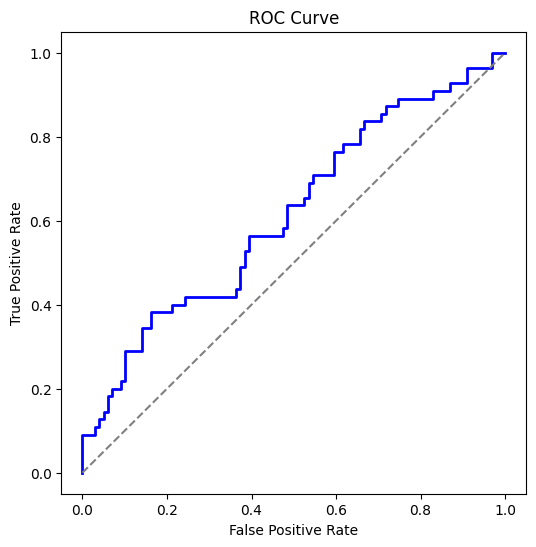

In [29]:
# Generate ROC curve
y_pred_prob = model_l1.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

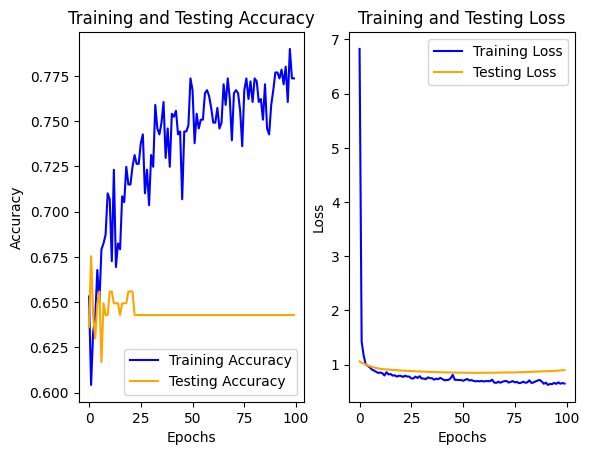

<Figure size 1200x600 with 0 Axes>

In [30]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_l1.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_l1.history['loss'], label='Training Loss', color='blue')
plt.plot(history_l1.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [31]:
# Evaluate the model on the testing set
loss, accuracy = model_l1.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6570 - loss: 0.8768 
Classification Loss: 0.8973010778427124
Classification Accuracy: 0.6428571343421936
AUC Score: 0.6157943067033976
Confusion Matrix:
[[99  0]
 [55  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## L2 Regularization

In [32]:
# Define the feedforward neural network model with L2 regularization
model_l2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(1, activation='sigmoid')
])

# Compile the model with L2 regularization
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with L2 regularization
history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100


C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5861 - loss: 2.8672 - val_accuracy: 0.3896 - val_loss: 0.7899
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6797 - loss: 0.7964 - val_accuracy: 0.4221 - val_loss: 0.7794
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6133 - loss: 0.8086 - val_accuracy: 0.4416 - val_loss: 0.7704
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.6673 - val_accuracy: 0.4805 - val_loss: 0.7639
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - loss: 0.7329 - val_accuracy: 0.4740 - val_loss: 0.7579
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6663 - loss: 0.6798 - val_accuracy: 0.5065 - val_loss: 0.7523
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6629 - loss: 0.6615 - val_accuracy: 0.5065 - val_loss: 0.7458
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.6449 - val_accuracy: 0.5195 - val_loss: 0.7

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000160E40793A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


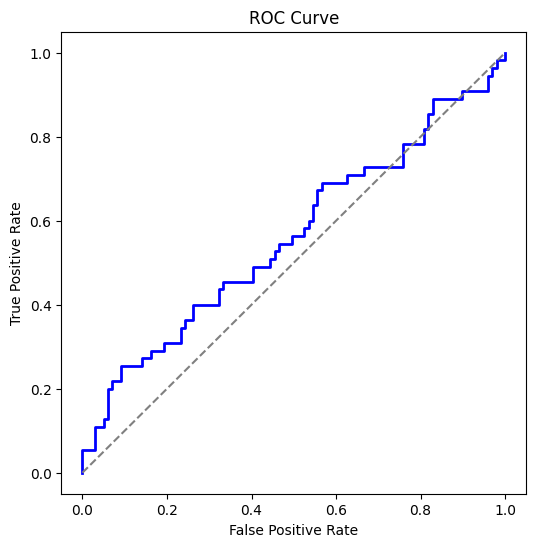

In [33]:
# Generate ROC curve
y_pred_prob = model_l2.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

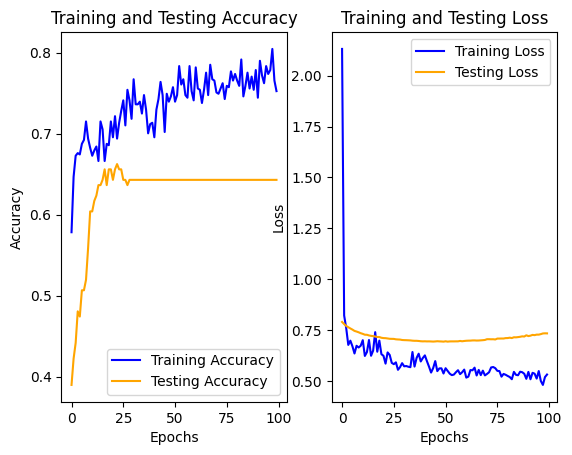

<Figure size 1200x600 with 0 Axes>

In [34]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_l2.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_l2.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [35]:
# Evaluate the model on the testing set
loss, accuracy = model_l2.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6570 - loss: 0.7220 
Classification Loss: 0.7336715459823608
Classification Accuracy: 0.6428571343421936
AUC Score: 0.5621671258034895
Confusion Matrix:
[[99  0]
 [55  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Dropout Regularization

In [36]:
# Define the feedforward neural network model with dropout regularization
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with dropout regularization
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout regularization
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6300 - loss: 13.9268 - val_accuracy: 0.5714 - val_loss: 0.6939
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 11.5372 - val_accuracy: 0.6299 - val_loss: 0.6823
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 6.7163 - val_accuracy: 0.6364 - val_loss: 0.6792
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5545 - loss: 6.0649 - val_accuracy: 0.6299 - val_loss: 0.6778
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5357 - loss: 4.5544 - val_accuracy: 0.6104 - val_loss: 0.6814
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5497 - loss: 4.2991 - val_accuracy: 0.6299 - val_loss: 0.6852
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5253 - loss: 4.4305 - val_accuracy: 0.5909 - val_loss: 0.6852
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 2.7961 - val_accuracy: 0.5974 - val_loss: 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


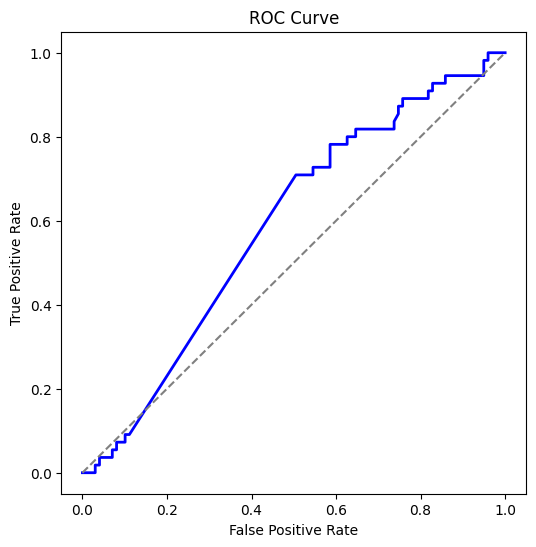

In [37]:
# Generate ROC curve
y_pred_prob = model_dropout.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

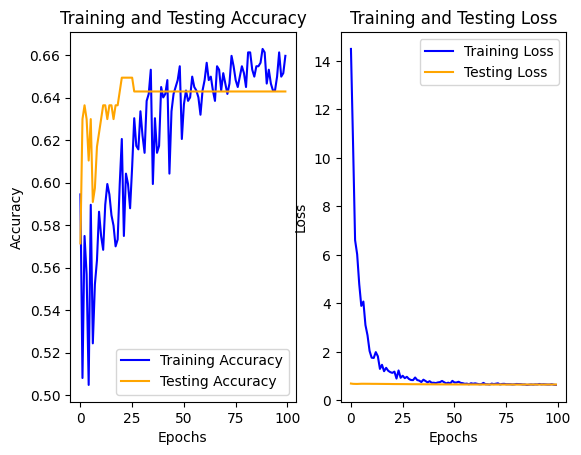

<Figure size 1200x600 with 0 Axes>

In [38]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_dropout.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [39]:
# Evaluate the model on the testing set
loss, accuracy = model_dropout.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6570 - loss: 0.6437  
Classification Loss: 0.6535201072692871
Classification Accuracy: 0.6428571343421936
AUC Score: 0.5868686868686869
Confusion Matrix:
[[99  0]
 [55  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\23820\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Early Stopping

In [40]:
# Use the unregularized model (classification_model in this example)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history_early_stopping = classification_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4621 - loss: 141.7553 - val_accuracy: 0.6688 - val_loss: 0.8451
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 7.9575 - val_accuracy: 0.6818 - val_loss: 0.7396
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6149 - loss: 4.2174 - val_accuracy: 0.7013 - val_loss: 0.6807
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 2.0969 - val_accuracy: 0.7078 - val_loss: 0.6707
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 1.6493 - val_accuracy: 0.7208 - val_loss: 0.6765
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 1.5201 - val_accuracy: 0.7338 - val_loss: 0.6758
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6137 - loss: 1.0092 - val_accuracy: 0.7403 - val_loss: 0.6798


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


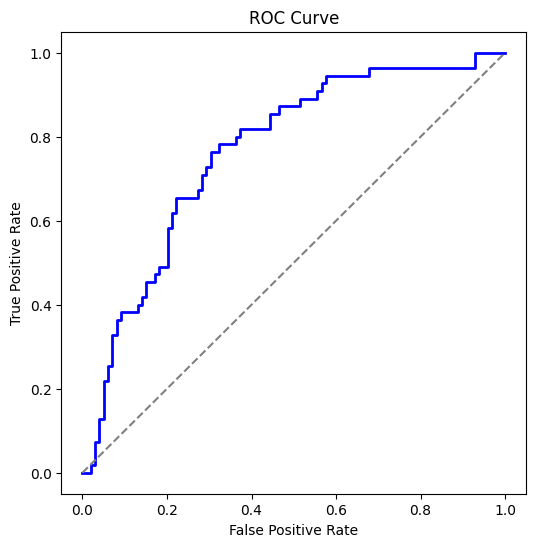

In [41]:
# Generate ROC curve
y_pred_prob = classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

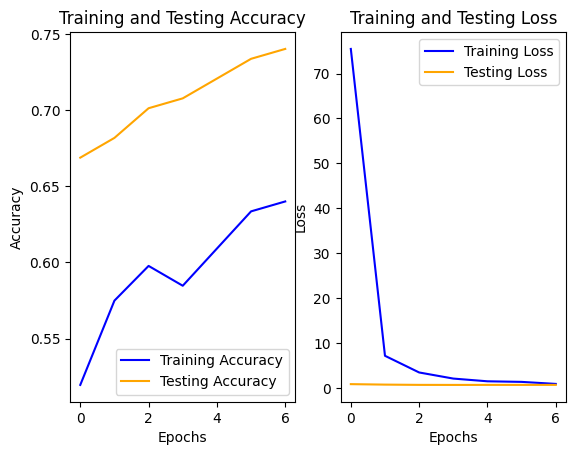

<Figure size 1200x600 with 0 Axes>

In [42]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_early_stopping.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_early_stopping.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_early_stopping.history['loss'], label='Training Loss', color='blue')
plt.plot(history_early_stopping.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [43]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7286 - loss: 0.6825  
Classification Loss: 0.6707471013069153
Classification Accuracy: 0.7077922224998474
AUC Score: 0.7663911845730027
Confusion Matrix:
[[73 26]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

